In [2]:
audio_path = "C:\\Users\\Thomas\\Desktop\\PhD\\data\\Media1.wav"

C:\Users\Thomas\AppData\Local\Temp\ipykernel_30788\2941785097.py:23: FutureWarning: Pass y=[-0.00567627 -0.00402832 -0.00161743 ...  0.00488281  0.00460815
  0.00137329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, fmax=8000)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_30788\2941785097.py:30: FutureWarning: Pass y=[-0.00567627 -0.00402832 -0.00161743 ...  0.00488281  0.00460815
  0.00137329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  plt.xlim(0, librosa.get_duration(y))


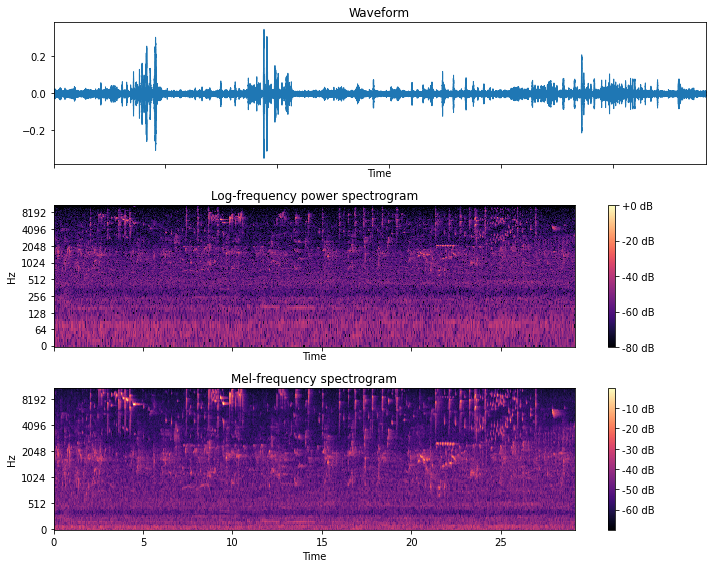

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
y, sr = librosa.load(audio_path)

# Create subplots
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10,8))

# Waveform plot
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Waveform')

# Spectrogram plot
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr, ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
fig.colorbar(img, ax=ax[1], format="%+2.0f dB")

# Mel-spectrogram plot
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, ax=ax[2])
ax[2].set(title='Mel-frequency spectrogram')
fig.colorbar(img, ax=ax[2], format="%+2.0f dB")

# Set x-axis limit for all subplots
plt.xlim(0, librosa.get_duration(y))

# Display plots
plt.tight_layout()
plt.show()

C:\Users\Thomas\AppData\Local\Temp\ipykernel_30788\2040496003.py:18: FutureWarning: Pass y=[-0.00567627 -0.00402832 -0.00161743 ...  0.00488281  0.00460815
  0.00137329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  plt.xlim(0, librosa.get_duration(y))


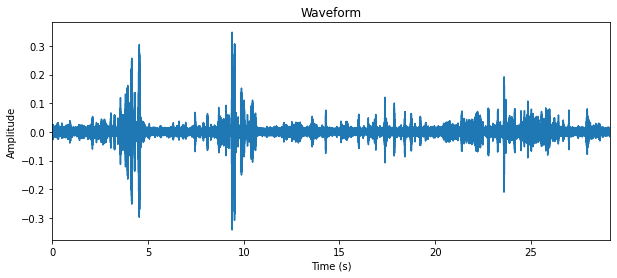

C:\Users\Thomas\AppData\Local\Temp\ipykernel_30788\2040496003.py:29: FutureWarning: Pass y=[-0.00567627 -0.00402832 -0.00161743 ...  0.00488281  0.00460815
  0.00137329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  plt.xlim(0, librosa.get_duration(y))


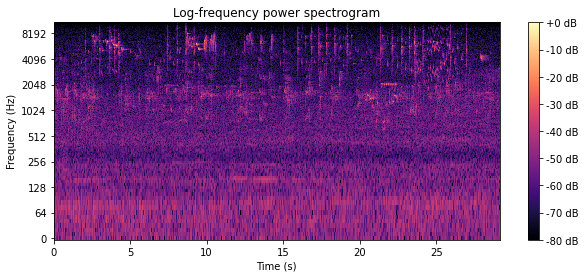

C:\Users\Thomas\AppData\Local\Temp\ipykernel_30788\2040496003.py:33: FutureWarning: Pass y=[-0.00567627 -0.00402832 -0.00161743 ...  0.00488281  0.00460815
  0.00137329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, fmax=8000)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_30788\2040496003.py:41: FutureWarning: Pass y=[-0.00567627 -0.00402832 -0.00161743 ...  0.00488281  0.00460815
  0.00137329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  plt.xlim(0, librosa.get_duration(y))


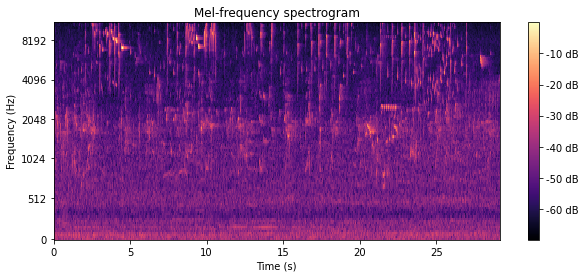

In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
y, sr = librosa.load(audio_path)

# Calculate time axis for waveform plot
t = np.arange(0, len(y)) / sr

# Waveform plot
plt.figure(figsize=(10,4))
plt.plot(t, y)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, librosa.get_duration(y))
plt.show()

# Spectrogram plot
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10,4))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr)
plt.colorbar(img, format="%+2.0f dB")
plt.title('Log-frequency power spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.xlim(0, librosa.get_duration(y))
plt.show()

# Mel-spectrogram plot
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(10,4))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(img, format="%+2.0f dB")
plt.title('Mel-frequency spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.xlim(0, librosa.get_duration(y))
plt.show()


Low-, band- and high pass filtering

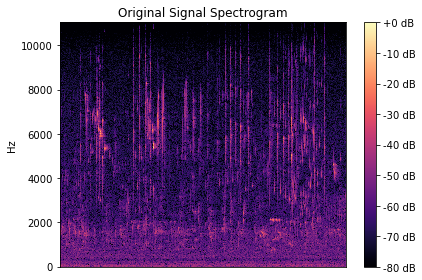

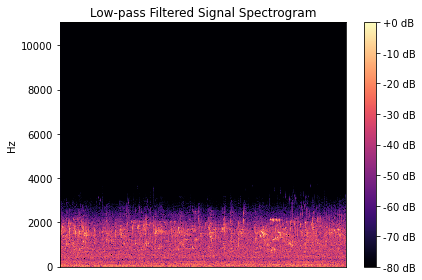

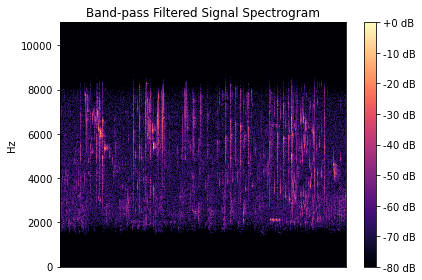

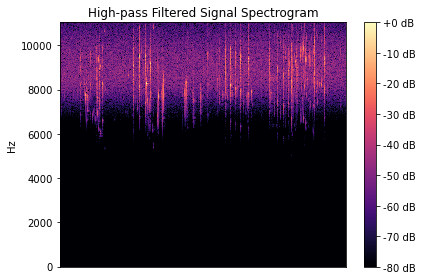

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# Load the .wav file
audio_file, sr = librosa.load(audio_path, sr=None)

# Define the filter parameters
nyquist_freq = sr / 2.0
cutoff_freq_low = 2000.0
cutoff_freq_high = 8000.0
filter_order = 5

# Low-pass filter
b_low, a_low = signal.butter(filter_order, cutoff_freq_low / nyquist_freq, 'low')
audio_file_lowpass = signal.filtfilt(b_low, a_low, audio_file)

# Band-pass filter
b_band, a_band = signal.butter(filter_order, [cutoff_freq_low / nyquist_freq, cutoff_freq_high / nyquist_freq], 'band')
audio_file_bandpass = signal.filtfilt(b_band, a_band, audio_file)

# High-pass filter
b_high, a_high = signal.butter(filter_order, cutoff_freq_high / nyquist_freq, 'high')
audio_file_highpass = signal.filtfilt(b_high, a_high, audio_file)

# Plot the spectrograms of the original and filtered signals
plt.figure(figsize=(6, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio_file)), ref=np.max), sr=sr, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Signal Spectrogram')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio_file_lowpass)), ref=np.max), sr=sr, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Low-pass Filtered Signal Spectrogram')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio_file_bandpass)), ref=np.max), sr=sr, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Band-pass Filtered Signal Spectrogram')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio_file_highpass)), ref=np.max), sr=sr, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('High-pass Filtered Signal Spectrogram')
plt.tight_layout()
plt.show()


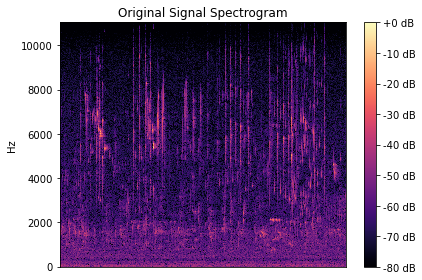

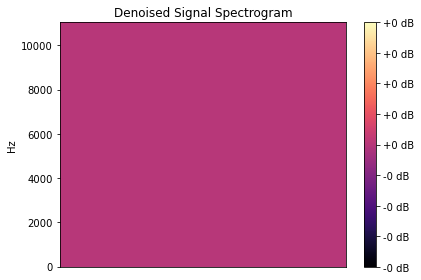

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the .wav file
audio_file, sr = librosa.load(audio_path, sr=None)

# Calculate the noise estimate from a noise-only section of the audio signal
noise_estimate = np.abs(librosa.stft(audio_file))**2

# Subtract the noise estimate from the spectrogram to obtain a noise-reduced spectrogram
alpha = 2
spectrogram_denoised = np.abs(librosa.stft(audio_file))**2 - alpha * noise_estimate

# ISTFT on the noise-reduced spectrogram to obtain the denoised audio signal
audio_file_denoised = librosa.istft(np.sqrt(np.maximum(spectrogram_denoised, 0)) * np.exp(1j * np.angle(librosa.stft(audio_file))))

# Plot the spectrograms of the original and denoised signals
plt.figure(figsize=(6, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio_file)), ref=np.max), sr=sr, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Signal Spectrogram')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio_file_denoised)), ref=np.max), sr=sr, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Denoised Signal Spectrogram')
plt.tight_layout()
plt.show()
